This project implements a Linear Regression Model to predict house prices based on key features such as square footage, number of bedrooms, and number of bathrooms. The model is built and trained using Python, with libraries like NumPy, pandas, and scikit-learn. This project is ideal for beginners in machine learning and serves as a practical demonstration of how regression techniques are applied in real-world scenarios.

**Features**:
Input Features:
Square footage of the house.
Number of bedrooms.
Number of bathrooms.
Prediction Output:
Estimated price of the house.
**Model Evaluation**:
Metrics such as Mean Squared Error (MSE) and R² Score to assess model performance.
**Data Visualization**:
Plots showing feature relationships, residuals, and model fit.
**Technologies Used**:
Programming Language: Python
Libraries:
pandas: For data manipulation and preprocessing.
NumPy: For numerical computations.
scikit-learn: For building and evaluating the regression model.
matplotlib & seaborn: For data visualization.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the dataset
dataset_path = "/content/drive/MyDrive/house-prices-advanced-regression-techniques"

In [ ]:
train_dir = "/content/drive/MyDrive/house-prices-advanced-regression-techniques/train.csv"
val_dir = "/content/drive/MyDrive/house-prices-advanced-regression-techniques/test.csv"

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/house-prices-advanced-regression-techniques/train.csv")

In [ ]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# Selecting relevant features and target variable
feature = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
target = 'SalePrice'

In [ ]:
# Checking for missing values
print(df[feature].isnull().sum())

GrLivArea       0
BedroomAbvGr    0
FullBath        0
dtype: int64


In [ ]:
# Filling missing values if any
df[feature] = df[feature].fillna(df[feature].median())

In [ ]:
# Splitting data into training and testing sets
X = df[feature]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Making predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 2806426667.247853
R² Score: 0.6341189942328371


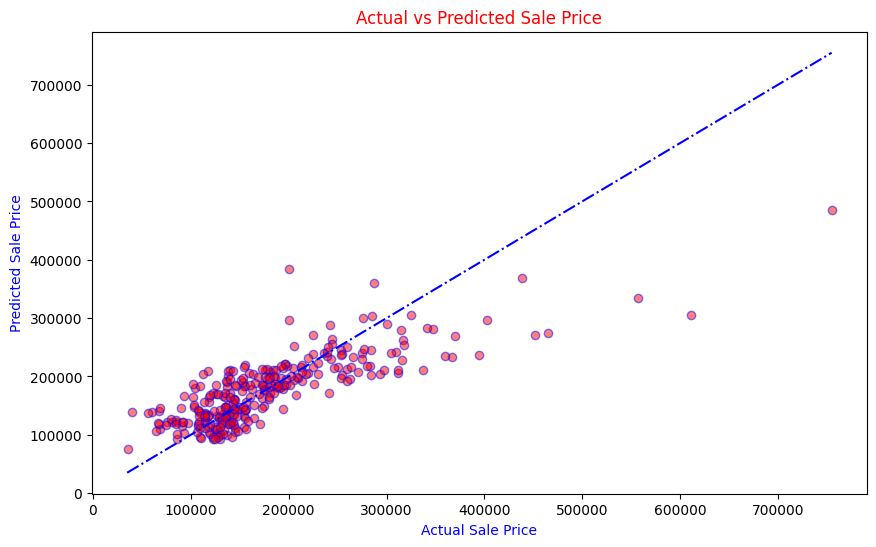

In [ ]:
plt.figure(figsize=(10, 6))                             #Ploting Actual vs Predicted Sales Price
plt.scatter(y_test, y_pred, alpha=0.5, color='r', edgecolors='b')
plt.xlabel('Actual Sale Price', color='blue')
plt.ylabel('Predicted Sale Price', color='blue')
plt.title('Actual vs Predicted Sale Price', color='red')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'b-.')
plt.show()

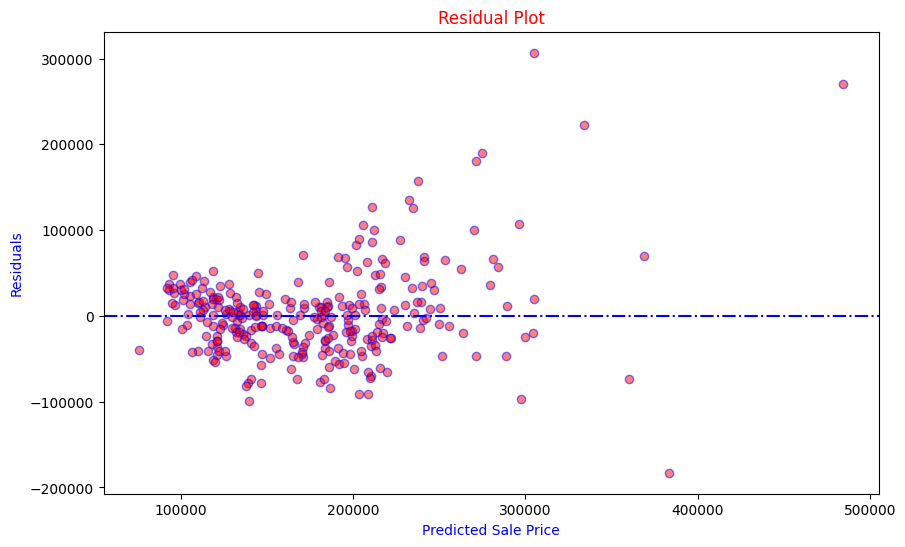

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5, color='r', edgecolors='b')
plt.xlabel('Predicted Sale Price', color='blue')
plt.ylabel('Residuals', color='blue')
plt.title('Residual Plot', color='red')
plt.axhline(y=0, color='b', linestyle='-.')
plt.show()

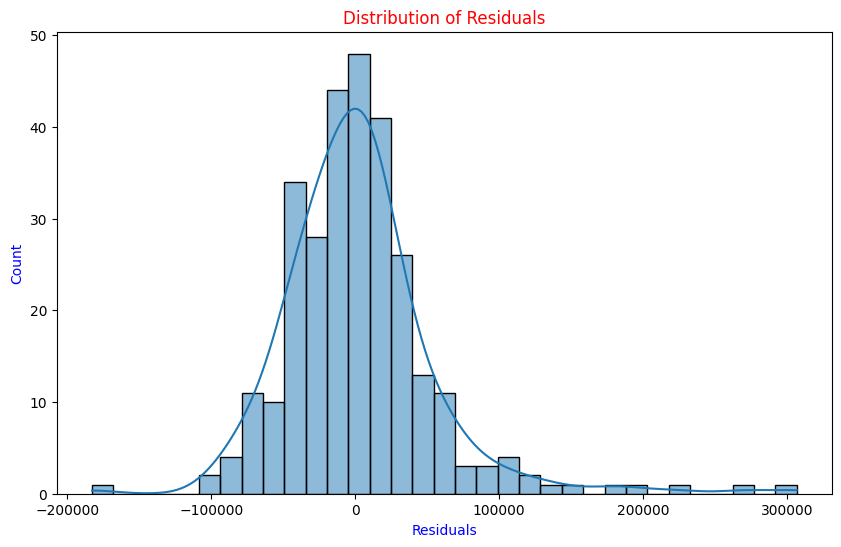

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals', color='b')
plt.ylabel('Count', color='b')
plt.title('Distribution of Residuals', color='r')
plt.show()

<Figure size 1200x800 with 0 Axes>

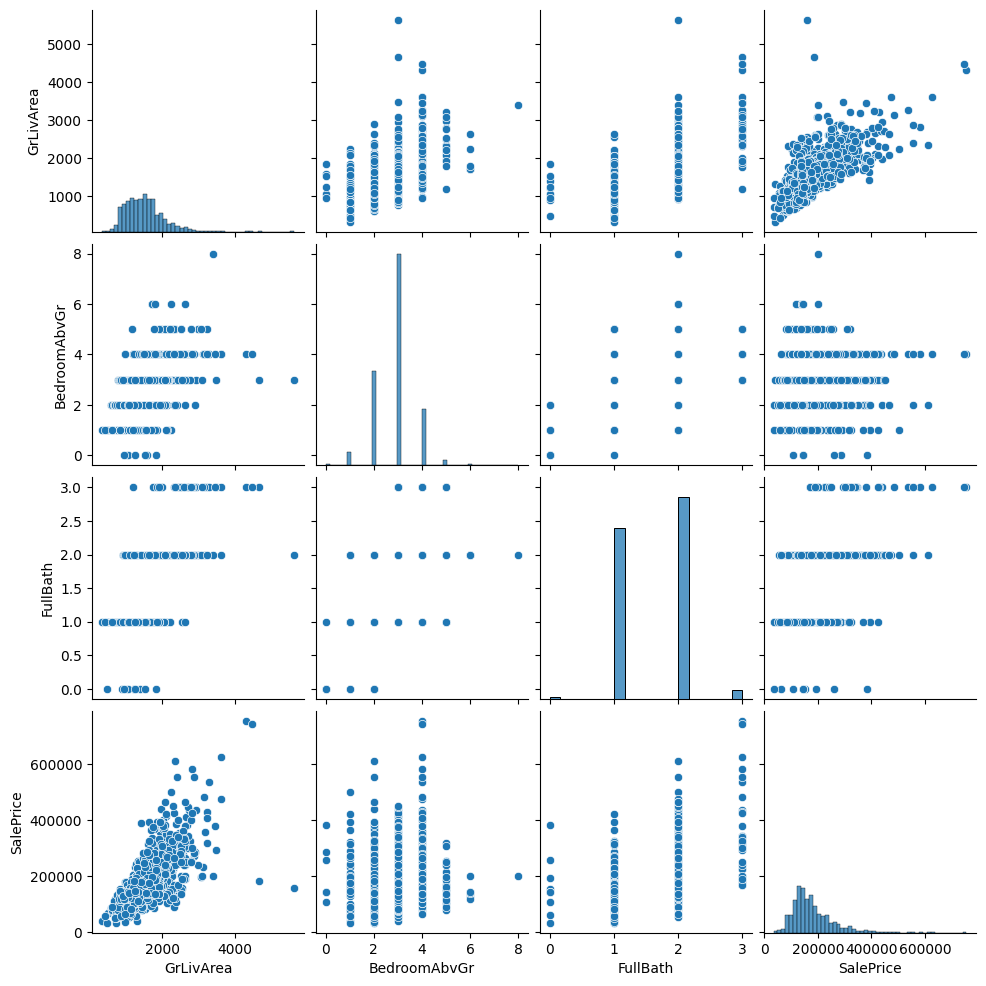

In [ ]:
#plot pairplot
plt.figure(figsize=(12, 8))
feature = ['GrLivArea', 'BedroomAbvGr', 'FullBath','SalePrice']
sns.pairplot(df[feature]) # select only relevant columns from df
plt.show()

In [ ]:
#prediction for a single example
ex_data = {'GrLivArea':[1000],'BedroomAbvGr':[5],'FullBath':[1],'HalfBath':[3],'TotRmsAbvGrd':[4]}
example = pd.DataFrame(ex_data)
# select only the features that were used for training
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath'] # redefined feature to prevent error
example = example[features]  # use 'features' instead of 'feature'
example_prediction = model.predict(example)
print(f'Example Prediction: ${example_prediction[0]:,.2f}')

# predictions on the test set.
test_data = pd.read_csv(val_dir) # added test data
X_test = test_data[features] # fixed the error
test_predictions = model.predict(X_test)

pred = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': test_predictions})
pred.to_csv('Predictions.csv', index=False)

Example Prediction: $53,026.55
